<a href="https://colab.research.google.com/github/kimdonggyu2008/SKT_FLY_AI_6/blob/main/KNN_PRACTICE_BINARY_CITRUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN 이진분류 CITRUS 데이터셋

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
np.random.seed(42)

1. 데이터셋 준비

In [115]:
!wget https://raw.githubusercontent.com/devdio/flyai_datasets/refs/heads/main/citrus.csv

--2024-12-30 05:41:34--  https://raw.githubusercontent.com/devdio/flyai_datasets/refs/heads/main/citrus.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 308294 (301K) [text/plain]
Saving to: ‘citrus.csv.1’

citrus.csv.1        100%[===================>] 301.07K  --.-KB/s    in 0.03s   

2024-12-30 05:41:34 (10.5 MB/s) - ‘citrus.csv.1’ saved [308294/308294]



In [116]:
df=pd.read_csv('citrus.csv')
df.shape

(10000, 6)

In [117]:
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


2. 전체 정보 확인

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [119]:
df.describe().T #수치적 데이터

,count,mean,std,min,25%,50%,75%,max
diameter,10000.0,9.975685,1.947844,2.96,8.46,9.980,11.4800,16.45
weight,10000.0,175.050792,29.212119,86.76,152.22,174.985,197.7225,261.51
red,10000.0,153.847800,10.432954,115.00,147.00,154.000,161.0000,192.00
green,10000.0,76.010600,11.708433,31.00,68.00,76.000,84.0000,116.00
blue,10000.0,11.363200,9.061275,2.00,2.00,10.000,17.0000,56.00


3. 범주형 변수

In [120]:
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [121]:
df['name'].value_counts() #데이터 비율이 맞는지 확인

,count
name,
orange,5000
grapefruit,5000


4. 연속형 변수

In [122]:
#df_orange=df[df['name']=="orange"]
df_orange=df.loc[df['name']=='orange',:]

In [123]:
df_orange

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
4995,orange,12.22,217.00,170,89,3
4996,orange,12.28,217.04,167,76,16
4997,orange,12.55,218.07,143,77,4
4998,orange,12.75,230.13,159,87,5


In [124]:
df_grapefruit=df.loc[df['name']=='grapefruit',:]

In [125]:
df_grapefruit

,name,diameter,weight,red,green,blue
5000,grapefruit,7.63,126.79,150,74,24
5001,grapefruit,7.69,133.98,150,43,15
5002,grapefruit,7.72,135.56,150,54,21
5003,grapefruit,7.77,135.62,150,75,15
5004,grapefruit,7.84,136.63,149,77,20
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


<Axes: ylabel='Count'>

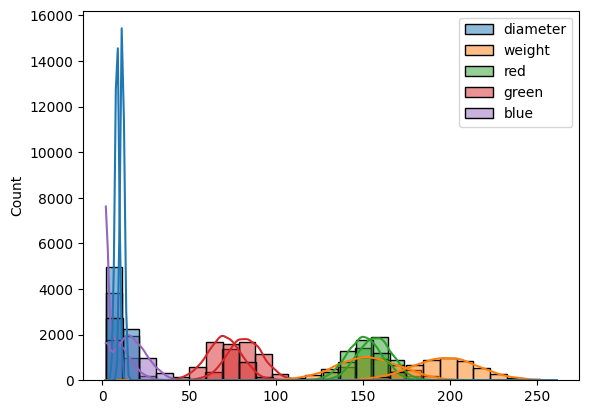

In [126]:
sns.histplot(data=df_orange,kde=True)
sns.histplot(data=df_grapefruit,kde=True)

4. 결측치

In [127]:
df.isna().sum()

,0
name,0
diameter,0
weight,0
red,0
green,0
blue,0


<Axes: >

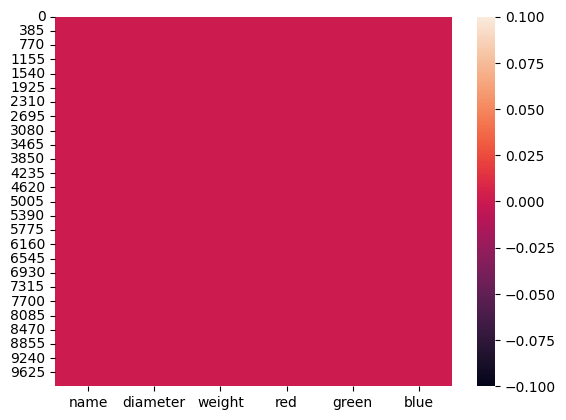

In [128]:
#sns.heatmap(df.isna(),cbar=False)
sns.heatmap(df.isna(),cbar=True)

이상치, 중복치도 추가적으로 확인해야함

4. 데이터 전처리
- 학습용, 검증용 데이터 분리

In [129]:
df.head(20)

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
5,orange,4.59,95.86,142,100,2
6,orange,4.64,97.94,156,85,2
7,orange,4.65,98.50,142,74,2
8,orange,4.68,100.20,159,90,16
9,orange,4.69,100.31,161,76,6


In [130]:
df=df.sample(frac=1) #데이터 섞기

In [131]:
df.head(20)

,name,diameter,weight,red,green,blue
6252,grapefruit,10.66,184.37,166,60,18
4684,orange,10.40,181.34,166,109,13
1731,orange,7.99,145.45,150,72,2
4742,orange,10.55,182.99,151,84,2
4521,orange,10.10,177.31,160,72,2
6340,grapefruit,10.73,185.35,167,56,19
576,orange,6.96,130.97,152,85,2
5202,grapefruit,9.34,163.22,163,85,24
6363,grapefruit,10.75,185.61,129,62,2
439,orange,6.78,127.42,171,93,4


In [132]:
idx_train=int(len(df)*0.6)
idx_val=int(len(df)*0.8)



In [133]:
train=df.iloc[:idx_train,:]
val=df.iloc[idx_train:idx_val]
test=df.iloc[idx_val:]

In [134]:
train

,name,diameter,weight,red,green,blue
6252,grapefruit,10.66,184.37,166,60,18
4684,orange,10.40,181.34,166,109,13
1731,orange,7.99,145.45,150,72,2
4742,orange,10.55,182.99,151,84,2
4521,orange,10.10,177.31,160,72,2
...,...,...,...,...,...,...
7895,grapefruit,11.70,201.41,165,52,2
9590,grapefruit,13.20,223.82,155,74,14
7288,grapefruit,11.31,195.38,165,73,26
278,orange,6.48,122.94,177,83,3


In [135]:
val

,name,diameter,weight,red,green,blue
2480,orange,8.46,152.47,150,76,4
289,orange,6.51,123.21,153,78,10
6086,grapefruit,10.53,182.21,138,58,20
3075,orange,8.84,158.10,163,103,14
8123,grapefruit,11.86,203.68,146,60,19
...,...,...,...,...,...,...
1638,orange,7.92,144.48,142,83,7
5891,grapefruit,10.35,179.58,166,94,18
7427,grapefruit,11.40,196.71,137,49,18
608,orange,7.00,131.46,157,89,2


In [136]:
test

,name,diameter,weight,red,green,blue
399,orange,6.70,126.50,168,80,3
7247,grapefruit,11.29,194.97,151,65,14
6406,grapefruit,10.77,186.32,158,72,19
882,orange,7.31,135.44,148,87,7
3565,orange,9.16,163.25,172,81,2
...,...,...,...,...,...,...
5734,grapefruit,10.18,176.92,145,77,15
5191,grapefruit,9.32,162.56,159,69,28
5390,grapefruit,9.72,169.85,150,67,10
860,orange,7.29,135.10,154,72,8


x,y 데이터 분리

In [137]:
train.head()

,name,diameter,weight,red,green,blue
6252,grapefruit,10.66,184.37,166,60,18
4684,orange,10.40,181.34,166,109,13
1731,orange,7.99,145.45,150,72,2
4742,orange,10.55,182.99,151,84,2
4521,orange,10.10,177.31,160,72,2


In [138]:
train.columns

Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

In [139]:
x_train=train[['diameter', 'weight', 'red', 'green', 'blue']]#리스트로 데이터만 읽어오기
y_train=train[['name']]

In [140]:
x_val=val[['diameter', 'weight', 'red', 'green', 'blue']]
y_val=val[['name']]

In [141]:
x_train

,diameter,weight,red,green,blue
6252,10.66,184.37,166,60,18
4684,10.40,181.34,166,109,13
1731,7.99,145.45,150,72,2
4742,10.55,182.99,151,84,2
4521,10.10,177.31,160,72,2
...,...,...,...,...,...
7895,11.70,201.41,165,52,2
9590,13.20,223.82,155,74,14
7288,11.31,195.38,165,73,26
278,6.48,122.94,177,83,3


In [142]:
x_val=val.drop('name',axis=1)#특정 열만 지우기

In [143]:
x_val

,diameter,weight,red,green,blue
2480,8.46,152.47,150,76,4
289,6.51,123.21,153,78,10
6086,10.53,182.21,138,58,20
3075,8.84,158.10,163,103,14
8123,11.86,203.68,146,60,19
...,...,...,...,...,...
1638,7.92,144.48,142,83,7
5891,10.35,179.58,166,94,18
7427,11.40,196.71,137,49,18
608,7.00,131.46,157,89,2


In [144]:
#y_val=val['name']

In [145]:
y_val

,name
2480,orange
289,orange
6086,grapefruit
3075,orange
8123,grapefruit
...,...
1638,orange
5891,grapefruit
7427,grapefruit
608,orange


5.스케일링

In [146]:
x_train.head()

,diameter,weight,red,green,blue
6252,10.66,184.37,166,60,18
4684,10.40,181.34,166,109,13
1731,7.99,145.45,150,72,2
4742,10.55,182.99,151,84,2
4521,10.10,177.31,160,72,2


In [147]:
#평균
u=x_train.mean()
u

,0
diameter,9.933560
weight,174.427638
red,154.088833
green,76.107500
blue,11.222500


In [148]:
#표준편차
std=x_train.std()
std

,0
diameter,1.948931
weight,29.212149
red,10.459948
green,11.788162
blue,9.014315


In [149]:
x_train_s=(x_train-u)/std
x_train_s

,diameter,weight,red,green,blue
6252,0.372738,0.340350,1.138741,-1.366413,0.751860
4684,0.239331,0.236626,1.138741,2.790299,0.197186
1731,-0.997244,-0.991972,-0.390904,-0.348443,-1.023095
4742,0.316296,0.293110,-0.295301,0.669528,-1.023095
4521,0.085401,0.098670,0.565124,-0.348443,-1.023095
...,...,...,...,...,...
7895,0.906364,0.923669,1.043138,-2.045060,-1.023095
9590,1.676016,1.690816,0.087110,-0.178781,0.308121
7288,0.706254,0.717248,1.043138,-0.263612,1.639337
278,-1.772028,-1.762542,2.190371,0.584697,-0.912160


In [150]:
x_val_s=(x_val-u)/std
x_val_s

,diameter,weight,red,green,blue
2480,-0.756086,-0.751661,-0.390904,-0.009119,-0.801226
289,-1.756635,-1.753299,-0.104095,0.160542,-0.135618
6086,0.306034,0.266408,-1.538137,-1.536075,0.973729
3075,-0.561108,-0.558933,0.851932,2.281314,0.308121
8123,0.988460,1.001377,-0.773315,-1.366413,0.862794
...,...,...,...,...,...
1638,-1.033161,-1.025178,-1.155726,0.584697,-0.468422
5891,0.213676,0.176377,1.138741,1.517836,0.751860
7427,0.752433,0.762777,-1.633740,-2.299553,0.751860
608,-1.505215,-1.470882,0.278316,1.093682,-1.023095


6.레이블 인코딩

In [151]:
x_train.head()

,diameter,weight,red,green,blue
6252,10.66,184.37,166,60,18
4684,10.40,181.34,166,109,13
1731,7.99,145.45,150,72,2
4742,10.55,182.99,151,84,2
4521,10.10,177.31,160,72,2


In [152]:
y_train

,name
6252,grapefruit
4684,orange
1731,orange
4742,orange
4521,orange
...,...
7895,grapefruit
9590,grapefruit
7288,grapefruit
278,orange


In [153]:
y_val['name']

,name
2480,orange
289,orange
6086,grapefruit
3075,orange
8123,grapefruit
...,...
1638,orange
5891,grapefruit
7427,grapefruit
608,orange


In [154]:
label_dict = {'grapefruit': 0, 'orange': 1}
y_train_e = y_train['name'].map(label_dict)
y_val_e = y_val['name'].map(label_dict)

In [155]:
y_train_e

,name
6252,0
4684,1
1731,1
4742,1
4521,1
...,...
7895,0
9590,0
7288,0
278,1


In [156]:
y_val_e

,name
2480,1
289,1
6086,0
3075,1
8123,0
...,...
1638,1
5891,0
7427,0
608,1


7.학습

In [157]:
type(x_train_s),type(y_train_e),type(x_val_s),type(y_val_e)

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

In [158]:
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train_s,y_train_e)

KNeighborsClassifier()

In [159]:
y_pred=clf.predict(x_val_s)

In [160]:
(y_pred==y_val_e).sum()/len(y_val_e)

0.9235

In [161]:
for i in range(5,30):
  clf=KNeighborsClassifier(n_neighbors=i)
  #clf.fit(x_train,y_train_e)
  clf.fit(x_train_s,y_train_e)
  y_pred=clf.predict(x_val_s)
  acc=(y_pred==y_val_e).sum()/len(y_val_e)
  print("accuracy=",acc,"n=",i)

accuracy= 0.9235 n= 5
accuracy= 0.918 n= 6
accuracy= 0.9215 n= 7
accuracy= 0.9225 n= 8
accuracy= 0.9235 n= 9
accuracy= 0.925 n= 10
accuracy= 0.926 n= 11
accuracy= 0.9265 n= 12
accuracy= 0.9255 n= 13
accuracy= 0.9275 n= 14
accuracy= 0.927 n= 15
accuracy= 0.9265 n= 16
accuracy= 0.926 n= 17
accuracy= 0.9255 n= 18
accuracy= 0.926 n= 19
accuracy= 0.9255 n= 20
accuracy= 0.9255 n= 21
accuracy= 0.9255 n= 22
accuracy= 0.925 n= 23
accuracy= 0.925 n= 24
accuracy= 0.9245 n= 25
accuracy= 0.925 n= 26
accuracy= 0.9255 n= 27
accuracy= 0.9265 n= 28
accuracy= 0.925 n= 29


8. 베스트 모델, k는 6일때

In [162]:
clf=KNeighborsClassifier(n_neighbors=6)
clf.fit(x_train_s,y_train_e)

KNeighborsClassifier(n_neighbors=6)

In [163]:
y_pred=clf.predict(x_val_s)

In [164]:
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [165]:
acc=(y_pred==y_val_e).sum()/len(y_val_e)

In [166]:
acc

0.918

confusion matrix 시각화

In [167]:
from sklearn.metrics import confusion_matrix

cfm=confusion_matrix(y_val_e,y_pred)

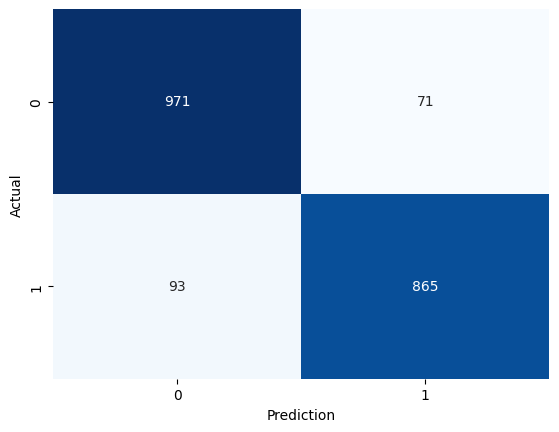

In [168]:
s=sns.heatmap(cfm,annot=True,fmt='d',cbar=False,cmap='Blues')
s.set(xlabel='Prediction',ylabel='Actual')
plt.show()

7.테스트

In [169]:
test.head()

,name,diameter,weight,red,green,blue
399,orange,6.70,126.50,168,80,3
7247,grapefruit,11.29,194.97,151,65,14
6406,grapefruit,10.77,186.32,158,72,19
882,orange,7.31,135.44,148,87,7
3565,orange,9.16,163.25,172,81,2


In [170]:
test.columns

Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

In [171]:
x_test=test.drop('name',axis=1)
y_test=test['name']

In [172]:
x_test.shape, y_test.shape

((2000, 5), (2000,))

In [173]:
x_test_u=x_test.mean()
x_test_s=x_test.std()

In [174]:
x_test

,diameter,weight,red,green,blue
399,6.70,126.50,168,80,3
7247,11.29,194.97,151,65,14
6406,10.77,186.32,158,72,19
882,7.31,135.44,148,87,7
3565,9.16,163.25,172,81,2
...,...,...,...,...,...
5734,10.18,176.92,145,77,15
5191,9.32,162.56,159,69,28
5390,9.72,169.85,150,67,10
860,7.29,135.10,154,72,8


In [175]:
x_test_e=(x_test-u)/x_test_s
x_test_e

,diameter,weight,red,green,blue
399,-1.663946,-1.645297,1.337056,0.334064,-0.898201
7247,0.698005,0.705194,-0.296880,-0.953275,0.303406
6406,0.430421,0.408250,0.375917,-0.352516,0.849591
882,-1.350048,-1.338398,-0.585221,0.934823,-0.461253
3565,-0.398063,-0.383715,1.721511,0.419887,-1.007438
...,...,...,...,...,...
5734,0.126815,0.085560,-0.873563,0.076597,0.412643
5191,-0.315730,-0.407401,0.472031,-0.609984,1.832724
5390,-0.109895,-0.157145,-0.392994,-0.781629,-0.133542
860,-1.360340,-1.350069,-0.008538,-0.352516,-0.352016


In [176]:
y_test

,name
399,orange
7247,grapefruit
6406,grapefruit
882,orange
3565,orange
...,...
5734,grapefruit
5191,grapefruit
5390,grapefruit
860,orange


In [177]:
y_test_e=y_test.map(label_dict)

In [178]:
y_test_e

,name
399,1
7247,0
6406,0
882,1
3565,1
...,...
5734,0
5191,0
5390,0
860,1


In [189]:
pred = clf.predict(x_test_s.to_frame().T)  # Series를 DataFrame으로 변환 후 전치


In [190]:
pred

array([0])

In [191]:
acc=(pred==y_test_e).sum()/len(y_test_e)

ValueError: ('Lengths must match to compare', (2000,), (1,))

In [ ]:
acc

In [192]:
print("정확도",acc)

정확도 0.92


9. 성능평가

In [193]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

In [194]:
def print_metrics(y_true,y_pred):
  acc=accuracy_score(y_true,y_pred)
  re=recall_score(y_true,y_pred)
  pre=precision_score(y_true,y_pred)
  f1=f1_score(y_true,y_pred)

  print("acc:",acc)
  print("re:",re)
  print("pre:",pre)
  print("f1:",f1)
  cfm=confusion_matrix(y_true,y_pred)
  s=sns.heatmap(cfm,annot=True,fmt='d',cbar=False,cmap='Blues')
  s.set(xlabel='Prediction',ylabel='Actual')
  plt.show()


In [195]:
print_metrics(y_test,y_pred)

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['grapefruit' 'orange'] and y_pred=[0 1]. Make sure that the predictions provided by the classifier coincides with the true labels.